In [1]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [27]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow import keras

In [4]:
import numpy 

In [5]:
print(tensorflow.__version__)

1.11.0


In [6]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = numpy.argsort(numpy.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [7]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [8]:
import pandas

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pandas.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [10]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
# Test data is *not* used when calculating the mean and std

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [11]:
df = pandas.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.397253,1.412057,-1.126646,-0.256833,-1.027385,0.726354,-1.000164,0.023834,-0.511142,-0.047533,-1.490674,0.415841,-0.836487
1,0.087846,-0.483615,1.028326,-0.256833,1.371293,-3.817250,0.676891,-1.049006,1.675886,1.565287,0.784476,-0.000885,-0.775760
2,-0.395379,1.201427,-0.690066,-0.256833,-0.942023,0.827918,-0.939245,0.259915,-0.626249,-0.914123,-0.398602,0.448077,-1.347144
3,-0.403759,3.097099,-1.022279,-0.256833,-1.095675,0.351129,-1.480347,2.364762,-0.626249,-0.330379,-0.262093,0.400521,-0.880652
4,-0.348692,-0.483615,-0.720935,-0.256833,-0.455458,3.467186,0.501302,-0.417158,-0.165822,-0.595170,-0.489608,0.289557,-1.119419


In [12]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense( 64, activation=tensorflow.nn.relu, input_shape=(train_data.shape[1],) ),
    keras.layers.Dense( 64, activation=tensorflow.nn.relu ),
    keras.layers.Dense(1)
  ])

  optimizer = tensorflow.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

  return model

In [13]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [15]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [16]:
EPOCHS = 500

# Store training stats
history = model.fit( train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1,
                    callbacks=[ early_stop, PrintDot() ] )

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 2s 6ms/step - loss: 557.3911 - mean_absolute_error: 21.6878 - val_loss: 574.4580 - val_mean_absolute_error: 22.1869
Epoch 2/500
323/323 [==============================] - 0s 87us/step - loss: 505.2720 - mean_absolute_error: 20.4589 - val_loss: 513.4827 - val_mean_absolute_error: 20.8329
Epoch 3/500
323/323 [==============================] - 0s 99us/step - loss: 444.5551 - mean_absolute_error: 18.9589 - val_loss: 441.0366 - val_mean_absolute_error: 19.0930
Epoch 4/500
323/323 [==============================] - 0s 99us/step - loss: 372.9668 - mean_absolute_error: 17.0792 - val_loss: 354.1445 - val_mean_absolute_error: 16.8369
Epoch 5/500
323/323 [==============================] - 0s 105us/step - loss: 291.5727 - mean_absolute_error: 14.8249 - val_loss: 257.8456 - val_mean_absolute_error: 13.9794
Epoch 6/500
323/323 [==============================] - 0s 99us/step - loss: 209.6497 - mean_abs

323/323 [==============================] - 0s 84us/step - loss: 7.6285 - mean_absolute_error: 2.0493 - val_loss: 15.8871 - val_mean_absolute_error: 2.8015
Epoch 49/500
323/323 [==============================] - 0s 77us/step - loss: 7.3754 - mean_absolute_error: 2.0347 - val_loss: 16.3421 - val_mean_absolute_error: 2.7971
Epoch 50/500
323/323 [==============================] - 0s 84us/step - loss: 7.3970 - mean_absolute_error: 1.9943 - val_loss: 16.6098 - val_mean_absolute_error: 2.8205
Epoch 51/500
323/323 [==============================] - 0s 87us/step - loss: 7.4278 - mean_absolute_error: 2.0097 - val_loss: 16.0502 - val_mean_absolute_error: 2.8058
Epoch 52/500
323/323 [==============================] - 0s 74us/step - loss: 7.1526 - mean_absolute_error: 2.0236 - val_loss: 17.6143 - val_mean_absolute_error: 2.8811
Epoch 53/500
323/323 [==============================] - 0s 84us/step - loss: 7.3805 - mean_absolute_error: 1.9596 - val_loss: 16.2950 - val_mean_absolute_error: 2.8426
Epoch

Epoch 97/500
323/323 [==============================] - 0s 80us/step - loss: 5.6613 - mean_absolute_error: 1.8032 - val_loss: 15.2439 - val_mean_absolute_error: 2.6542
Epoch 98/500
323/323 [==============================] - 0s 84us/step - loss: 5.6316 - mean_absolute_error: 1.7411 - val_loss: 16.2386 - val_mean_absolute_error: 2.8280
Epoch 99/500
323/323 [==============================] - 0s 77us/step - loss: 5.7249 - mean_absolute_error: 1.8034 - val_loss: 16.3086 - val_mean_absolute_error: 2.7830
Epoch 100/500
323/323 [==============================] - 0s 80us/step - loss: 5.8760 - mean_absolute_error: 1.7810 - val_loss: 15.1390 - val_mean_absolute_error: 2.6555
Epoch 101/500
323/323 [==============================] - 0s 80us/step - loss: 5.6892 - mean_absolute_error: 1.7637 - val_loss: 15.7328 - val_mean_absolute_error: 2.7041
Epoch 102/500
323/323 [==============================] - 0s 74us/step - loss: 5.5524 - mean_absolute_error: 1.7625 - val_loss: 17.3371 - val_mean_absolute_err

Epoch 145/500
323/323 [==============================] - 0s 93us/step - loss: 4.5833 - mean_absolute_error: 1.5727 - val_loss: 14.1069 - val_mean_absolute_error: 2.5801
Epoch 146/500
323/323 [==============================] - 0s 84us/step - loss: 4.6577 - mean_absolute_error: 1.5787 - val_loss: 13.8964 - val_mean_absolute_error: 2.5802
Epoch 147/500
323/323 [==============================] - 0s 87us/step - loss: 4.6306 - mean_absolute_error: 1.5770 - val_loss: 13.9781 - val_mean_absolute_error: 2.5532
Epoch 148/500
323/323 [==============================] - 0s 84us/step - loss: 4.7255 - mean_absolute_error: 1.6063 - val_loss: 14.6323 - val_mean_absolute_error: 2.6528
Epoch 149/500
323/323 [==============================] - 0s 77us/step - loss: 4.7410 - mean_absolute_error: 1.6014 - val_loss: 15.7188 - val_mean_absolute_error: 2.7873


In [17]:
from matplotlib import pyplot

In [18]:
def plot_history(history):
    pyplot.figure()
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Mean Abs Error [1000$]')
  
    pyplot.plot(history.epoch, numpy.array(history.history['mean_absolute_error']), label='Train Loss')
    pyplot.plot(history.epoch, numpy.array(history.history['val_mean_absolute_error']), label = 'Val loss')
    
    pyplot.legend()
    pyplot.ylim([0, 5])

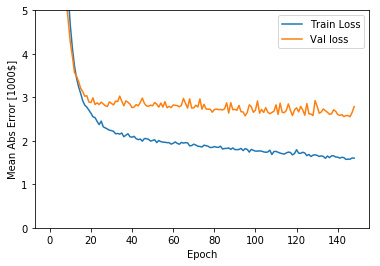

In [19]:
plot_history(history)

In [20]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2560.98


In [21]:
def plot_predict(test_labels, test_predictions):
    pyplot.scatter(test_labels, test_predictions)
    
    pyplot.xlabel('True Values [1000$]')
    pyplot.ylabel('Predictions [1000$]')
    
    pyplot.axis('equal')
    
    pyplot.xlim(pyplot.xlim())
    pyplot.ylim(pyplot.ylim())
    
    _ = pyplot.plot([-100, 100], [-100, 100])

In [22]:
test_predictions = model.predict(test_data).flatten()

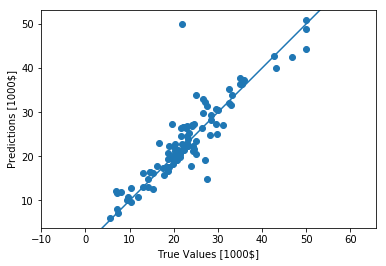

In [23]:
plot_predict(test_labels, test_predictions)

In [24]:
def plot_predict_error(test_labels, test_predictions):
    error = test_predictions - test_labels
    
    pyplot.hist(error, bins = 50)
    
    pyplot.xlabel("Prediction Error [1000$]")
    _ = pyplot.ylabel("Count")

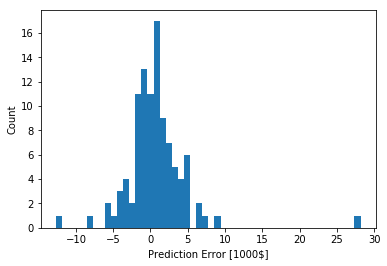

In [25]:
plot_predict_error(test_labels, test_predictions)